In [4]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...


True

# Reuters Summary

This article focused on the discrepancies found in Harvard University's president Claudine Gay’s PhD dissertation and other published articles. An investigation found that she needed to submit corrections to some citations, but did not find research misconduct. It also mentions her controversial testimony about the protests on Harvard’s campus about the Israeli-Hamas conflict. The article presents more of a summary of events, it does not go much into details about the plagiarism allegations.

# FoxNews Summary

This article also focuses on the discrepancies found in Harvard University's president Claudine Gay’s published articles. The word plagiarism is used more compared to the Reuters article. More details about the plagiarism complaints are presented along with information from an external investigation. This article makes the plagiarism accusations a bigger deal compared to the Reuters article.

In [31]:
# Reuters Article

import PyPDF2

reuters_path = r"C:\Users\alexa\OneDrive\Documents\Babson\Advanced_Programming\Assignment 1\reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"

with open(reuters_path, 'rb') as reuters_file:
    pdf_reader = PyPDF2.PdfReader(reuters_file)
    pages = len(pdf_reader.pages)
    reuters_extracted_text = ""
    for page_num in range(pages):
        page = pdf_reader.pages[page_num]
        reuters_extracted_text += page.extract_text()

print(reuters_extracted_text)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

In [32]:
# FoxNews Article

import PyPDF2

foxnews_path = r"C:\Users\alexa\OneDrive\Documents\Babson\Advanced_Programming\Assignment 1\foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf"

with open(foxnews_path, 'rb') as foxnews_file:
    pdf_reader = PyPDF2.PdfReader(foxnews_file)
    pages = len(pdf_reader.pages)
    foxnews_extracted_text = ""
    for page_num in range(pages):
        page = pdf_reader.pages[page_num]
        foxnews_extracted_text += page.extract_text()

print(foxnews_extracted_text)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

# Anomalies

Other than formatting and structural changes to the imported articles, no text differences are seen.


In [40]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

reuters_sentiment = analyze_sentiment(reuters_extracted_text)

print("Reuters sentiment scores are:", reuters_sentiment)

Reuters sentiment scores are: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


In [41]:
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

foxnews_sentiment = analyze_sentiment(foxnews_extracted_text)

print("FoxNews sentiment scores are:", foxnews_sentiment)

FoxNews sentiment scores are: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


# Sentiment Analysis on Article

I agree that the Rauters article is relatively neutral according to the analysis, but I am surprised that the analysis ranked the FoxNews article as being more positive. I think the FoxNews article leaned more negative.


In [47]:
reuters_title = "Harvard president will submit dissertation edits after plagiarism allegations"

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

reuters_title_sentiment = analyze_sentiment(reuters_title)

print("Reuters title sentiment scores are:", reuters_title_sentiment)

Reuters title sentiment scores are: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [49]:
foxnews_title = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

foxnews_title_sentiment = analyze_sentiment(foxnews_title)

print("FoxNews title sentiment scores are:", foxnews_title_sentiment)

FoxNews title sentiment scores are: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


# Sentiment Analysis on Title

I agree that both the Rauters and FoxNews titles are relatively neutral according to the analysis. With the FoxNews title leaning more negative, probably due to the word 'embattled'.

In [65]:
from readability import Readability

def calculate_readability_scores(text):
    r = Readability(text)
    fk_gl = r.flesch_kincaid().grade_level
    gf_index = r.gunning_fog().score
    dale_chall_score = r.dale_chall().score

    return {
        'Flesch-Kimcaid Gade Level': fk_gl,
        'Gunning Fog Index': gf_index,
        'Dale-Chall Readability Score': dale_chall_score
        }

reuters_scores = calculate_readability_scores(reuters_extracted_text)
print("Reuters readability scores:", reuters_scores)

Reuters readability scores: {'Flesch-Kimcaid Gade Level': '19', 'Gunning Fog Index': 19.59404318689501, 'Dale-Chall Readability Score': 12.616721933836827}


In [64]:
from readability import Readability

def calculate_readability_scores(text):
    r = Readability(text)
    fk_gl = r.flesch_kincaid().grade_level
    gf_index = r.gunning_fog().score
    dale_chall_score = r.dale_chall().score

    return {
        'Flesch-Kimcaid Gade Level': fk_gl,
        'Gunning Fog Index': gf_index,
        'Dale-Chall Readability Score': dale_chall_score
        }

foxnews_scores = calculate_readability_scores(foxnews_extracted_text)
print("Foxnews readability scores:", foxnews_scores)

Foxnews readability scores: {'Flesch-Kimcaid Gade Level': '19', 'Gunning Fog Index': 21.868487077434633, 'Dale-Chall Readability Score': 12.77964083329135}


# Readability Scores

I am surprised by how high the readability scores are. I did not think the articles were that difficult to comprehend. Most news articles try for a 8th - 10th grade level, so I do not know how well the croring went.



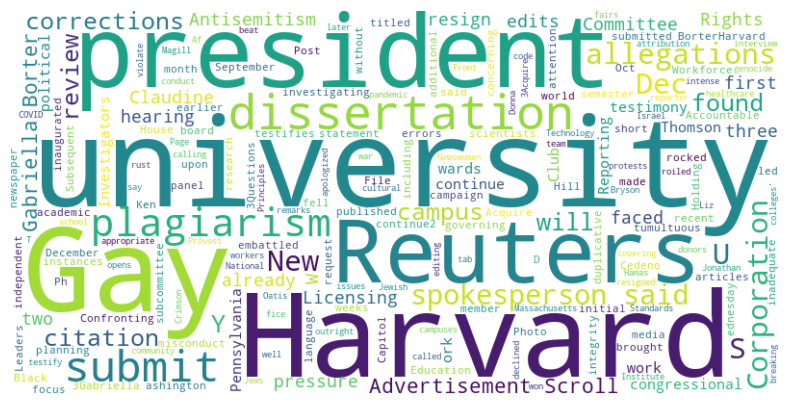

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_word_cloud(reuters_extracted_text)

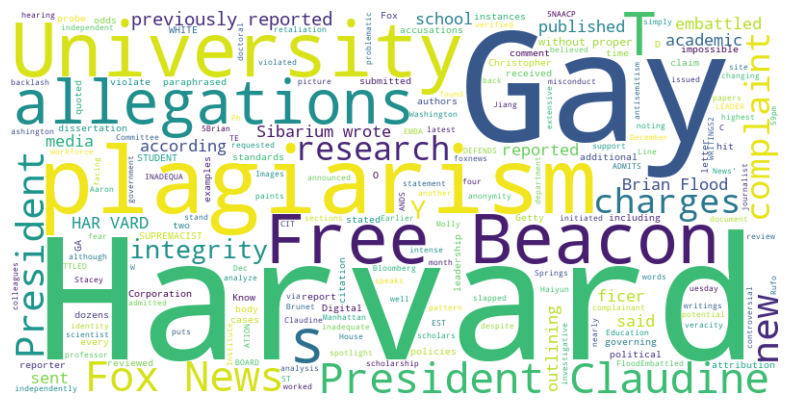

In [78]:
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_word_cloud(foxnews_extracted_text)

# Word Cloud

The word clouds look to represent the articles. They share a few of the similar major words. The biggest difference is FoxNews does emphasize the word plagiarism more than Reuters.

Microsoft Copilot used for troubleshooting.